In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/HR%20Analytics-%20Job%20Change%20of%20Data%20Scientists/aug_train.csv")

In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
train.shape

(19158, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
na_counts=train.isnull().sum()
na_counts

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

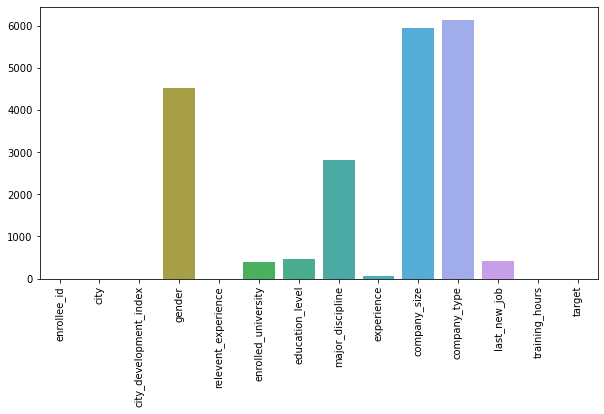

In [7]:
plt.figure(figsize=[10,5]);
sns.barplot(na_counts.index.values,na_counts);
plt.xticks(rotation=90);

In [8]:
train.drop(['company_size','company_type'],axis=1,inplace=True)

In [9]:
train.dropna(axis=0,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   last_new_job            12477 non-null  object 
 10  training_hours          12477 non-null  int64  
 11  target                  12477 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.2+ MB


In [10]:
train.duplicated().sum()

0

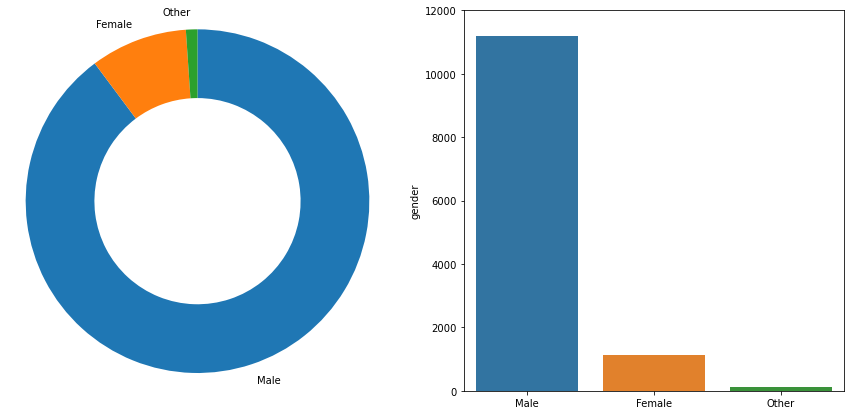

In [11]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sorted_counts=train['gender'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90,counterclock=False,wedgeprops={'width':0.4})
plt.axis('square');
plt.subplot(1,2,2)
sns.barplot(sorted_counts.index.values,sorted_counts)
#plt.yticks(range(np.arange(0,len(train)+1000,2000))
plt.yticks(range(0,14000,2000));

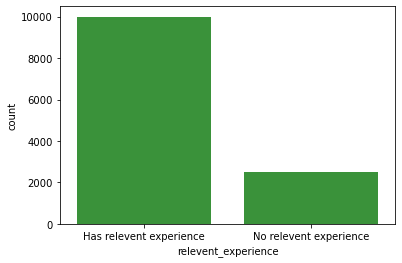

In [12]:
base_color=sns.color_palette()[2]
rects1=sns.countplot(data=train,x='relevent_experience',color=base_color);

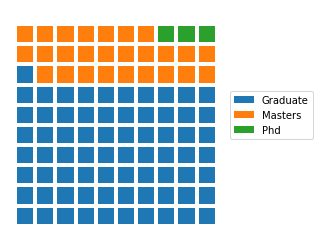

In [13]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * train[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts


waffle_counts = percentage_blocks(train, 'education_level')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

    
# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6);
plt.axis('off');
plt.axis('square');

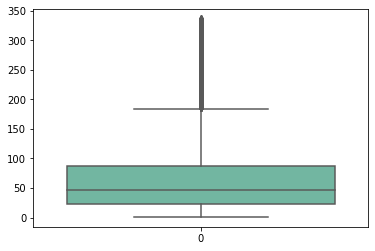

In [14]:
ax = sns.boxplot(data=train['training_hours'], orient="v", palette="Set2")

<AxesSubplot:xlabel='training_hours'>

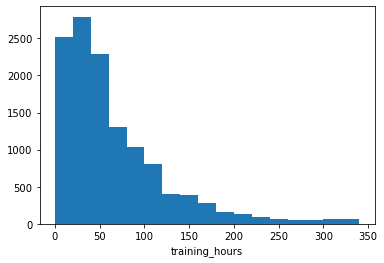

In [15]:
bin_edges = np.arange(0, train['training_hours'].max()+20, 20)
sns.distplot(train['training_hours'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

In [16]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,1,46,1.0


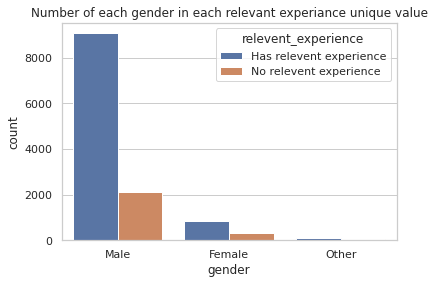

In [17]:
sns.set(style="whitegrid")
ax = sns.countplot(x="gender", hue="relevent_experience", data=train)
plt.title('Number of each gender in each relevant experiance unique value');

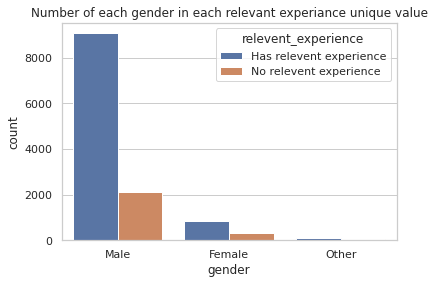

In [18]:
sns.set(style="whitegrid")
ax = sns.countplot(x="gender", hue="relevent_experience", data=train)
plt.title('Number of each gender in each relevant experiance unique value');

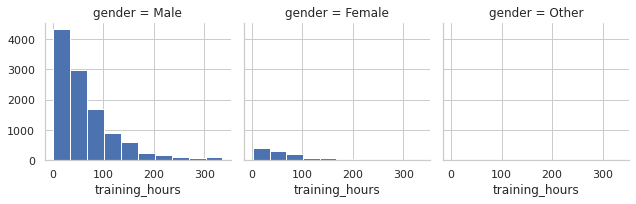

In [19]:
gender_types = list(train['gender'].unique())
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=gender_types)
train['gender'] = train['gender'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = train, col = 'gender')
g.map(plt.hist, "training_hours");

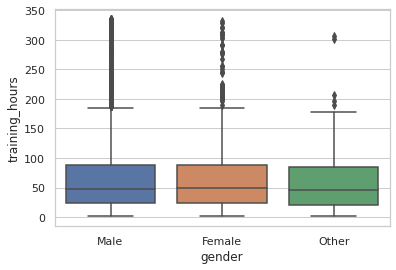

In [20]:
ax=sns.boxplot(data=train,x='gender',y='training_hours')

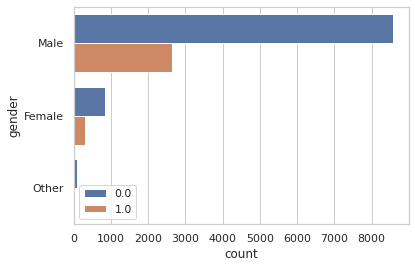

In [21]:
ax = sns.countplot(y="gender", hue="target", data=train)
plt.legend()

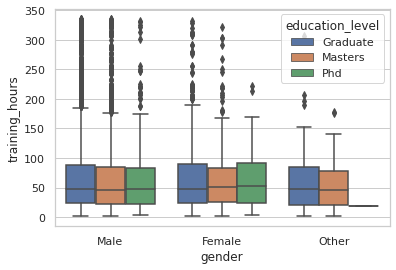

In [22]:
ax=sns.boxplot(data=train,x='gender',y='training_hours',hue='education_level')

In [23]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,1,46,1.0


In [24]:
train['gender']=train['gender'].replace({'Male':0,'Female':1,'Other':2})
train['enrolled_university']=train['enrolled_university'].replace({'no_enrollment':0,'Full time course':1,'Part time course':2})
train['relevent_experience']=train['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})
train['education_level']=train['education_level'].replace({'Graduate':1,'Masters':2,'Phd':3})

train['major_discipline']=train['major_discipline'].replace({'STEM':1, 'Humanities':2, 'Arts':3, 'Business Degree':4,'No Major':5,'Other':6})

train['experience']=train['experience'].replace({'>20':30,'<1':0})

train['last_new_job']=train['last_new_job'].replace({'>4':5,'1':1,'never':0,'4':4, '3':3, '2':2})
train['experience']=train['experience'].replace({'>20':30,'<1':0,'15':15,'13':13,'7':7, '5':5, '16':16, '4':4, '11':11, '18':18, '19':19, '12':12,
       '10':10, '9':9, '2':2, '6':6, '14':14, '3':3, '8':8, '20':20, '17':17, '1':1})
train['training_hours']=train['training_hours']/train['training_hours'].max()
train['experience']=train['experience']/train['experience'].max()
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,0,1,0,1,1,1.000000,1,0.107143,1.0
1,29725,city_40,0.776,0,0,0,1,1,0.500000,5,0.139881,0.0
4,666,city_162,0.767,0,1,0,2,1,1.000000,4,0.023810,0.0
7,402,city_46,0.762,0,1,0,1,1,0.433333,5,0.053571,1.0
8,27107,city_103,0.920,0,1,0,1,1,0.233333,1,0.136905,1.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  int64  
 4   relevent_experience     12477 non-null  int64  
 5   enrolled_university     12477 non-null  int64  
 6   education_level         12477 non-null  int64  
 7   major_discipline        12477 non-null  int64  
 8   experience              12477 non-null  float64
 9   last_new_job            12477 non-null  int64  
 10  training_hours          12477 non-null  float64
 11  target                  12477 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.5+ MB


In [26]:
train.shape

(12477, 12)

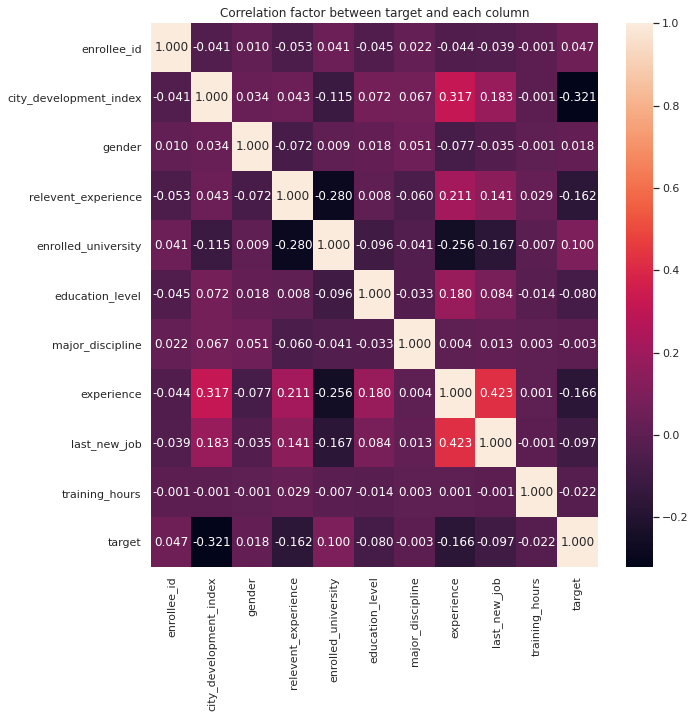

In [27]:
plt.figure(figsize=[10,10])
sns.heatmap(train.corr(),annot=True,fmt='.3f')
plt.title('Correlation factor between target and each column');

In [28]:
#our features and target
X=train.drop(['enrollee_id','city','target'],axis=1) #these featured don't benefit us in our clsassification 
y=train['target']

In [29]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


rand=RandomOverSampler(random_state=42)
x_ros, y_ros = rand.fit_resample(X, y)
print(f"Imbalanced target class: {Counter(y)} Balanced target class:{Counter(y_ros)}")

Imbalanced target class: Counter({0.0: 9511, 1.0: 2966}) Balanced target class:Counter({1.0: 9511, 0.0: 9511})


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (12744, 9)
X_test shape is  (6278, 9)
y_train shape is  (12744,)
y_test shape is  (6278,)


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
 

GBCModel = GradientBoostingClassifier(n_estimators=500,max_depth=50,random_state=33) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
 
#Calculating Prediction
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

GBCModel Train Score is :  0.9916823603264281
GBCModel Test Score is :  0.8482000637145588


In [32]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=500,max_depth=10,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.7770715630885122
RandomForestClassifierModel Test Score is :  0.7429117553360943
RandomForestClassifierModel features importances are :  [0.47280022 0.01949754 0.08427127 0.04291434 0.02312742 0.02983477
 0.14096356 0.05056196 0.13602893]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0. 0. 1. 1. 1. 1. 0. 1. 0. 1.]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.64586852 0.35413148]
 [0.71732476 0.28267524]
 [0.29228745 0.70771255]
 [0.17031261 0.82968739]
 [0.18671328 0.81328672]
 [0.33246509 0.66753491]
 [0.73085822 0.26914178]
 [0.38471178 0.61528822]
 [0.6383963  0.3616037 ]
 [0.35256212 0.64743788]]


In [33]:
F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.7429117553360943


In [34]:
from sklearn.metrics import classification_report
#----------------------------------------------------

#----------------------------------------------------
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

         0.0       0.70      0.83      0.76      3070
         1.0       0.80      0.66      0.72      3208

    accuracy                           0.74      6278
   macro avg       0.75      0.74      0.74      6278
weighted avg       0.75      0.74      0.74      6278



Confusion Matrix is : 
 [[2560  510]
 [1104 2104]]


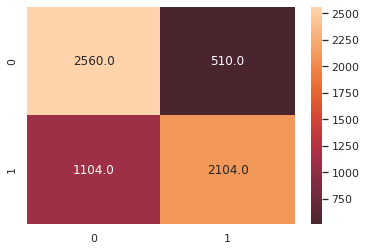

In [35]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,annot=True,fmt='.1f')
plt.show()

In [36]:
test = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/HR%20Analytics-%20Job%20Change%20of%20Data%20Scientists/aug_test.csv")

In [37]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [39]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [40]:
test.drop(['company_size','company_type','enrollee_id','city'],axis=1,inplace=True)
test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,1,21
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,1,98
2,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,never,15
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,1,39
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,>4,72


In [41]:
test['gender']=test['gender'].replace({'Male':0,'Female':1,'Other':2})
test['enrolled_university']=test['enrolled_university'].replace({'no_enrollment':0,'Full time course':1,'Part time course':2})
test['relevent_experience']=test['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})
test['education_level']=test['education_level'].replace({'Graduate':1,'High School':4,'Primary School':6,'Masters':2,'Phd':3})

test['major_discipline']=test['major_discipline'].replace({'STEM':1, 'Humanities':2, 'Arts':3, 'Business Degree':4,'No Major':5,'Other':6})

test['experience']=test['experience'].replace({'>20':30,'<1':0})

test['last_new_job']=test['last_new_job'].replace({'>4':5,'1':1,'never':0,'4':4, '3':3, '2':2})
test['experience']=test['experience'].replace({'>20':30,'<1':0,'15':15,'13':13,'7':7, '5':5, '16':16, '4':4, '11':11, '18':18, '19':19, '12':12,
       '10':10, '9':9, '2':2, '6':6, '14':14, '3':3, '8':8, '20':20, '17':17, '1':1})

In [42]:
test['gender'].fillna(test['gender'].mode()[0],inplace=True)
test['enrolled_university'].fillna(test['enrolled_university'].mode()[0],inplace=True)
test['education_level'].fillna(test['education_level'].mode()[0],inplace=True)
test['major_discipline'].fillna(test['major_discipline'].mode()[0],inplace=True)
test['last_new_job'].fillna(test['last_new_job'].mode()[0],inplace=True)
test['experience'].fillna(test['experience'].mean(),inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  2129 non-null   float64
 2   relevent_experience     2129 non-null   int64  
 3   enrolled_university     2129 non-null   float64
 4   education_level         2129 non-null   float64
 5   major_discipline        2129 non-null   float64
 6   experience              2129 non-null   float64
 7   last_new_job            2129 non-null   float64
 8   training_hours          2129 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 149.8 KB


In [43]:
test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours
0,0.827,0.0,1,1.0,1.0,1.0,9.0,1.0,21
1,0.920,1.0,1,0.0,1.0,1.0,5.0,1.0,98
2,0.624,0.0,0,0.0,4.0,1.0,0.0,0.0,15
3,0.827,0.0,1,0.0,2.0,1.0,11.0,1.0,39
4,0.920,0.0,1,0.0,1.0,1.0,30.0,5.0,72


In [44]:
test_pred= RandomForestClassifierModel.predict(test)
test_pred

array([0., 0., 1., ..., 0., 0., 0.])